# Decision  Tree Classification

<span>A decision tree classier is a very simple tree-like model. The classifier will build a decision tree and split the classes by layer heuristics and the consequences of each path in the decision tree. The methodology is both used in operations and machine learning research. Using the sklearn the model can be trained with various parameter adjustments such a tree depth and minimum number of samples in each layer.</span>

### Import Dataset

In [1]:
%matplotlib inline
%pylab inline
 
import graphviz 
import pandas as pd 
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
 
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pylab.rcParams['figure.figsize'] = (5.0, 5.0)
warnings.filterwarnings('ignore');

Populating the interactive namespace from numpy and matplotlib


### Import Data

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target


train_x, test_x, train_y, text_y = train_test_split(X,y)

### Define the Model

In [3]:
model = DecisionTreeClassifier(max_depth=5)

### Fit the Model

In [4]:
model.fit(train_x, train_y);

### Cross Validation Score

In [5]:
scores = cross_val_score(model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.92275


### Confustion Matrix

In [6]:
# Training Confusion Matrix
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            153    2
       1              1  270

### Predict Results

In [7]:
pd.Series(model.predict(test_x)).head(n=7)

0    0
1    1
2    1
3    1
4    0
5    1
6    0
dtype: int64

### Viewing our Results in Graphviz

You might have troubling viewing the output of the decision tree on mobile device. Attempt reviewing the image on a desktop. 

In [9]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [11]:
breast_cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

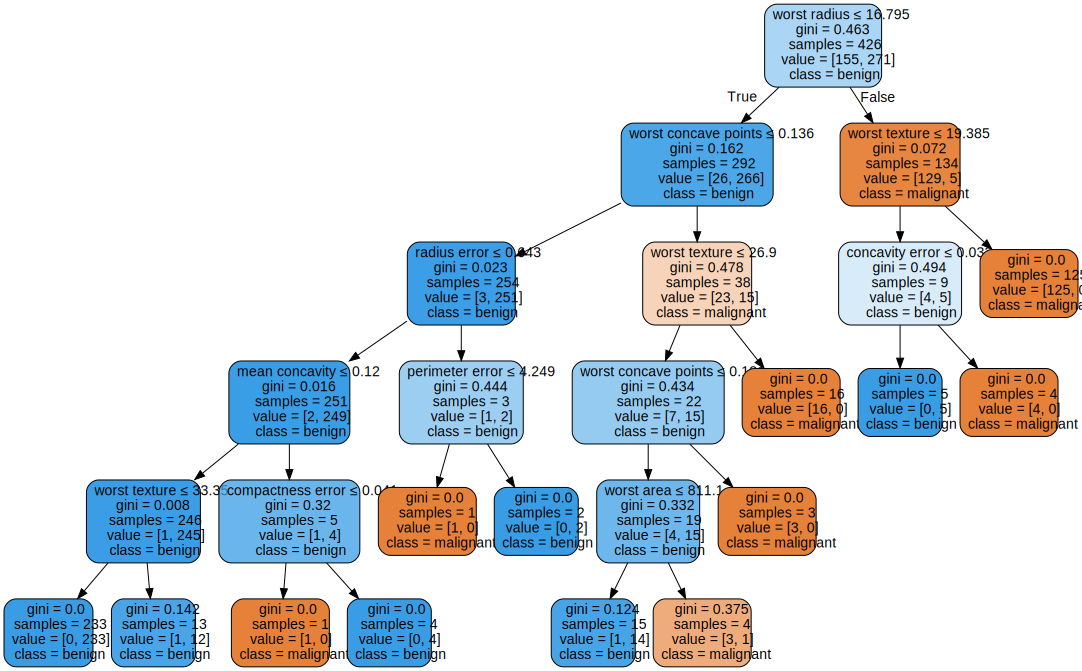

In [8]:
# Plot the decision hierachy of the model using graphiz
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=breast_cancer.feature_names,  
                         class_names=breast_cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Author: Kavi Sekhon